In [190]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd


%matplotlib inline


In [191]:
image_train  = 'day_night_images/train'
image_test  = 'day_night_images/test'

night


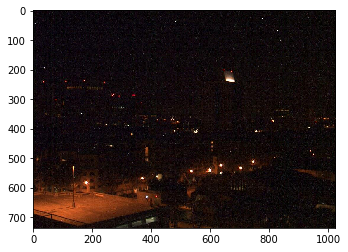

In [192]:
image_list = helpers.load_dataset(image_train)


plt.imshow(image_list[127][0])
print(image_list[127][1])

In [193]:
def standardize_image(image):
    standardized_image = cv2.resize(image,(1100,600))
    return standardized_image

def encode(label):
    if label == "day": return 1
    return 0

In [194]:
standard_images=[]
def standardize(image_list):
    
    for image in image_list:
        standard_images.append((standardize_image(image[0]),encode(image[1])))    


label: 1


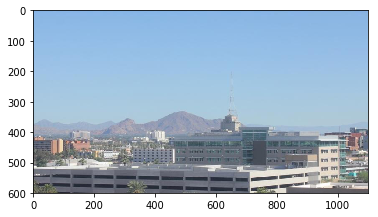

In [195]:
standardize(image_list)
plt.imshow(standard_images[12][0])
print(f'label: {standard_images[12][1]}')

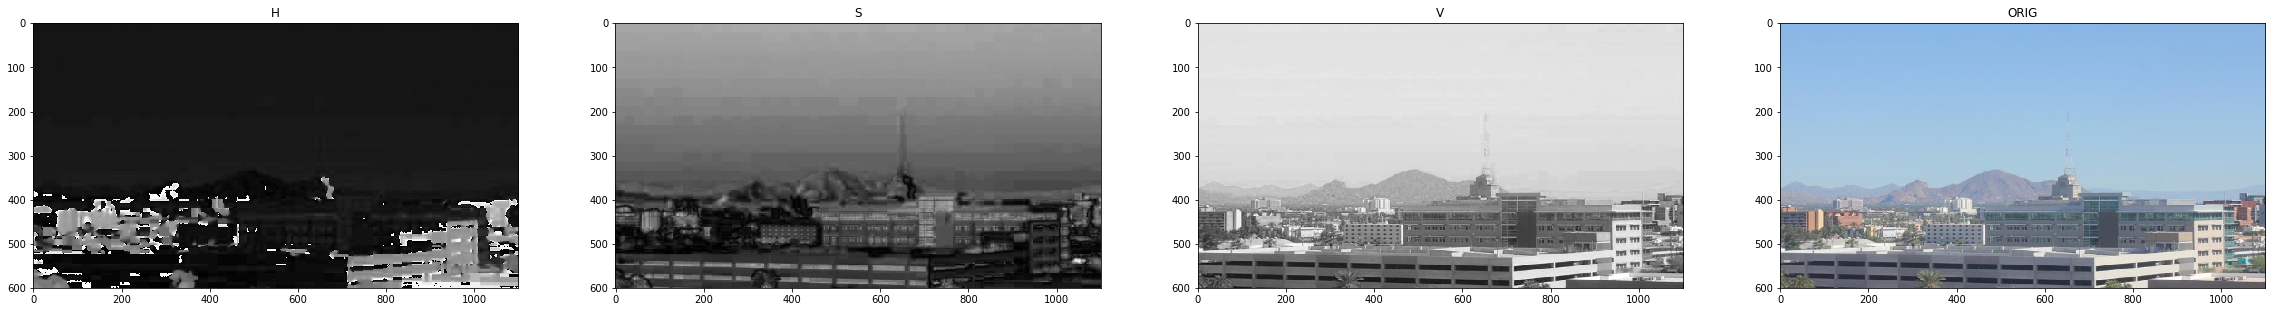

In [196]:
hsv = cv2.cvtColor(standard_images[12][0],cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(40,20))
ax1.set_title('H') 
ax1.imshow(h,cmap='gray')
ax2.set_title('S') 
ax2.imshow(s,cmap='gray')
ax3.set_title('V') 
ax3.imshow(v,cmap='gray')
ax4.set_title('ORIG') 
ax4.imshow(standard_images[12][0],cmap='gray')

In [197]:
def avg_brightness(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    v = hsv[:,:,2]
    avg_sum = np.sum(v)
    return avg_sum/(img.shape[0]*img.shape[1])
    

In [198]:
avg_list=[]
for img in standard_images:
    avg_list.append((avg_brightness(img[0]),img[1]))
avg_list

[(175.1298712121212, 1),
 (192.95477272727274, 1),
 (132.14143181818181, 1),
 (199.78479696969697, 1),
 (109.96470151515152, 1),
 (200.05443484848485, 1),
 (112.16535303030302, 1),
 (103.3498606060606, 1),
 (198.1317787878788, 1),
 (104.26712878787879, 1),
 (197.48356515151517, 1),
 (105.53668484848485, 1),
 (195.13657272727272, 1),
 (108.44821515151516, 1),
 (195.48862272727274, 1),
 (107.67083636363637, 1),
 (196.85269545454545, 1),
 (191.30163939393938, 1),
 (111.67128333333334, 1),
 (181.7687196969697, 1),
 (110.31529242424243, 1),
 (187.73953333333333, 1),
 (109.05684090909091, 1),
 (188.32743181818182, 1),
 (110.27060151515151, 1),
 (189.6661, 1),
 (107.37748484848485, 1),
 (191.57502272727274, 1),
 (105.61812424242424, 1),
 (103.38714545454546, 1),
 (145.6390181818182, 1),
 (163.87239393939393, 1),
 (160.28111515151514, 1),
 (123.64255151515151, 1),
 (158.06506666666667, 1),
 (152.4585893939394, 1),
 (157.41313484848484, 1),
 (104.08395151515151, 1),
 (155.3777303030303, 1),
 (1

Text(0.5,1,'Scatter Plot of mtcars')

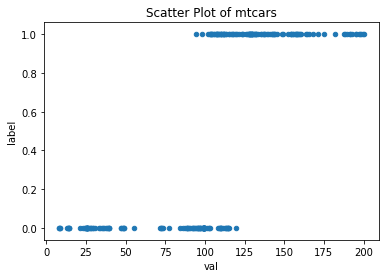

In [199]:
avg_df = pd.DataFrame(avg_list)
avg_df.columns=['val','label']
avg_df
avg_df.plot.scatter(x='val', y='label')
plt.title("Scatter Plot of mtcars")


In [200]:
df1 = avg_df.groupby('label')
pd.options.display.max_rows=60
avg_df

#min_day_avg = min(avg_list[][1])

,val,label
0,175.129871,1
1,192.954773,1
2,132.141432,1
3,199.784797,1
4,109.964702,1
5,200.054435,1
6,112.165353,1
7,103.349861,1
8,198.131779,1
9,104.267129,1


In [201]:
list_night = []
list_day = []
for p in avg_list:    
    if(p[1]==0): 
        list_night.append(p)
    else:
        list_day.append(p)

In [202]:
#print(list_night)
max_night = max(i[0] for i in list_night)
print(max_night)
#print(list_day)
min_day= min(i[0] for i in list_day)
print(min_day)
threshold = (min_day + max_night)/2
print(threshold)

119.6223
94.57182878787879
107.09706439393939


In [206]:
def prediction(img):
    if(avg_brightness(img)<=threshold):
        return "night"
    else:
        return "day"

In [207]:
test_images = helpers.load_dataset(image_test)

In [214]:
#plt.imshow(test_images[0][0])
img = test_images[152]
pred = prediction(img[0])
print(f'true label: {img[1]}')
print(f'predicted label: {pred}')


true label: night
predicted label: night
